<h1>TP: postérisation d'image</h1>

Exercice 1:

 lire et afficher une image en python en utilisant imread() et imshow() de matplotlib. L'image est stockée dans une matrice numpy à 3 dimensions. Les deux premières dimensions permettent de sélectionner respectivement une ligne et une colonne de l’image, donc un pixel : on trouve alors un tableau à 3 éléments, du type [rouge, vert, bleu], donnant la couleur du pixel sous forme d’un triplet.

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mplim
import pandas as pd

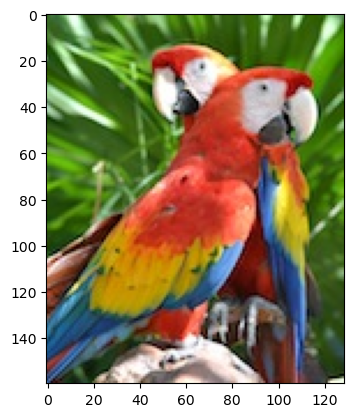

In [113]:
image = plt.imread("./ara2.png")
plt.imshow(image)

Etape 2 : faire une copie de l'image d'origine, car nous allons la modifier. Utiliser deepcopy du package copy.


In [114]:
import copy
copyImage = copy.deepcopy(image)

Etape 3 :
Nous désirons réduire le nombre de couleurs d’une image à k couleurs. Il s’agit donc de regrouper les couleurs en k clusters, de sorte à minimiser la somme des carrés des distances entre chaque couleur et le barycentre de son cluster. Tous les points d’un cluster seront remplacés par la couleur du centre de gravité de la classe.

Il faut réorganiser les dimensions de l'image pour avoir que deux dimensions contenant la liste des pixels. Utiliser la méthode reshape et stocker la nouvelle matrice dans la variable couleurs. Attention, il n'y a pas de copie des valeurs, mais uniquement une interprétation de la structure mémoire.

In [115]:
couleurs = image.reshape(-1,3)
couleurs

array([[0.2627451 , 0.44313726, 0.2       ],
       [0.29411766, 0.48235294, 0.24705882],
       [0.32156864, 0.50980395, 0.30588236],
       ...,
       [0.9843137 , 1.        , 0.9372549 ],
       [0.9647059 , 1.        , 0.93333334],
       [0.95686275, 0.99215686, 0.9098039 ]], dtype=float32)

- Afficher le pixel de coordonnée (10, 10) de l'image. Puis, retrouver le même pixel dans la matrice couleur. Utiliser l'attribut shape.
  
- Modifier le pixel (0, 0) de l'image et vérifier qu'il est bien modifier dans couleur.

In [116]:
pixel10x10 = copyImage[10,10]
pixel10x10

array([0.20784314, 0.42352942, 0.16862746], dtype=float32)

In [117]:
hauteur, largeur, couleur = image.shape
pixel10x10Copy = couleurs[largeur*10+10]
pixel10x10Copy

array([0.20784314, 0.42352942, 0.16862746], dtype=float32)

Etape 4:
De la bibliothèque scipy utiliser la fonction kmean2 avec comme paramètre couleurs et le nombre de classes k pour obtenir les coordonnées des k centres de gravité ainsi que l'affectation des couleurs aux k classes. Faire afficher le contenu des 2 variables de retour de kmean2.


In [118]:
from scipy.cluster.vq import kmeans2
# Définir le nombre de clusters (k)
k = 2

# Appliquer K-means
centroids, labels = kmeans2(couleurs, k)
print(centroids)
print(labels)

[[0.31215793 0.33303964 0.14894049]
 [0.75550914 0.6119858  0.44337422]]
[0 0 0 ... 1 1 1]


Etape 5:
Remplacer chaque pixel de l'image d'origine pas son centre de gravité. Afficher l'image d'origine et la nouvelle image.

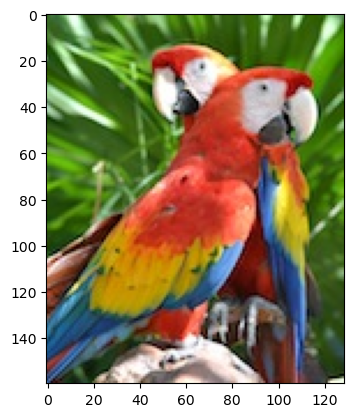

In [120]:
pixels = couleurs
for i in range(k):
    cluster_pixels = pixels[labels == i]
    gravity_center = np.mean(cluster_pixels, axis=0)
    pixels[labels == i] = gravity_center

# Remodeler l'image à sa forme d'origine
new_image = pixels.reshape(image.shape).astype(np.uint8)
plt.imshow(copyImage)

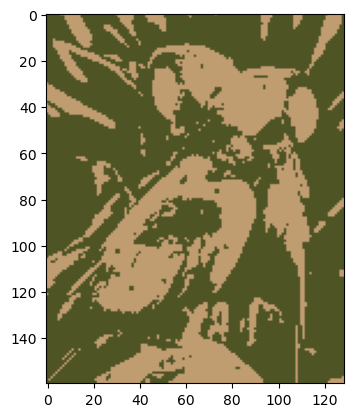

In [121]:
plt.imshow(image)

Etape 6 : remplacer kmean par un GMM